# Gender Recognition by Voice | 01 | Data Exploration

## Import Libraries

In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Set graphics to appear inline with notebook code*

In [11]:
%matplotlib inline
sns.set_style('whitegrid')

## Load data into DataFrame

**The Dataset**

The following acoustic properties of each voice are measured and included within the CSV:

- **meanfreq:** mean frequency (in kHz)
- **sd:** standard deviation of frequency
- **median:** median frequency (in kHz)
- **Q25:** first quantile (in kHz)
- **Q75:** third quantile (in kHz)
- **IQR:** interquantile range (in kHz)
- **skew:** skewness (see note in specprop description)
- **kurt:** kurtosis (see note in specprop description)
- **sp.ent:** spectral entropy
- **sfm:** spectral flatness
- **mode:** mode frequency
- **centroid:** frequency centroid (see specprop)
- **peakf:** peak frequency (frequency with highest energy)
- **meanfun:** average of fundamental frequency measured across acoustic signal
- **minfun:** minimum fundamental frequency measured across acoustic signal
- **maxfun:** maximum fundamental frequency measured across acoustic signal
- **meandom:** average of dominant frequency measured across acoustic signal
- **mindom:** minimum of dominant frequency measured across acoustic signal
- **maxdom:** maximum of dominant frequency measured across acoustic signal
- **dfrange:** range of dominant frequency measured across acoustic signal
- **modindx:** modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- **label:** male or female

In [12]:
data_raw = pd.read_csv('voice.csv')

In [25]:
print('Missing entries:', data_raw.isnull().sum().sum())
print('\n')
data_raw.info()

Missing entries: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [14]:
data_raw.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


## Plot highly disjointed data

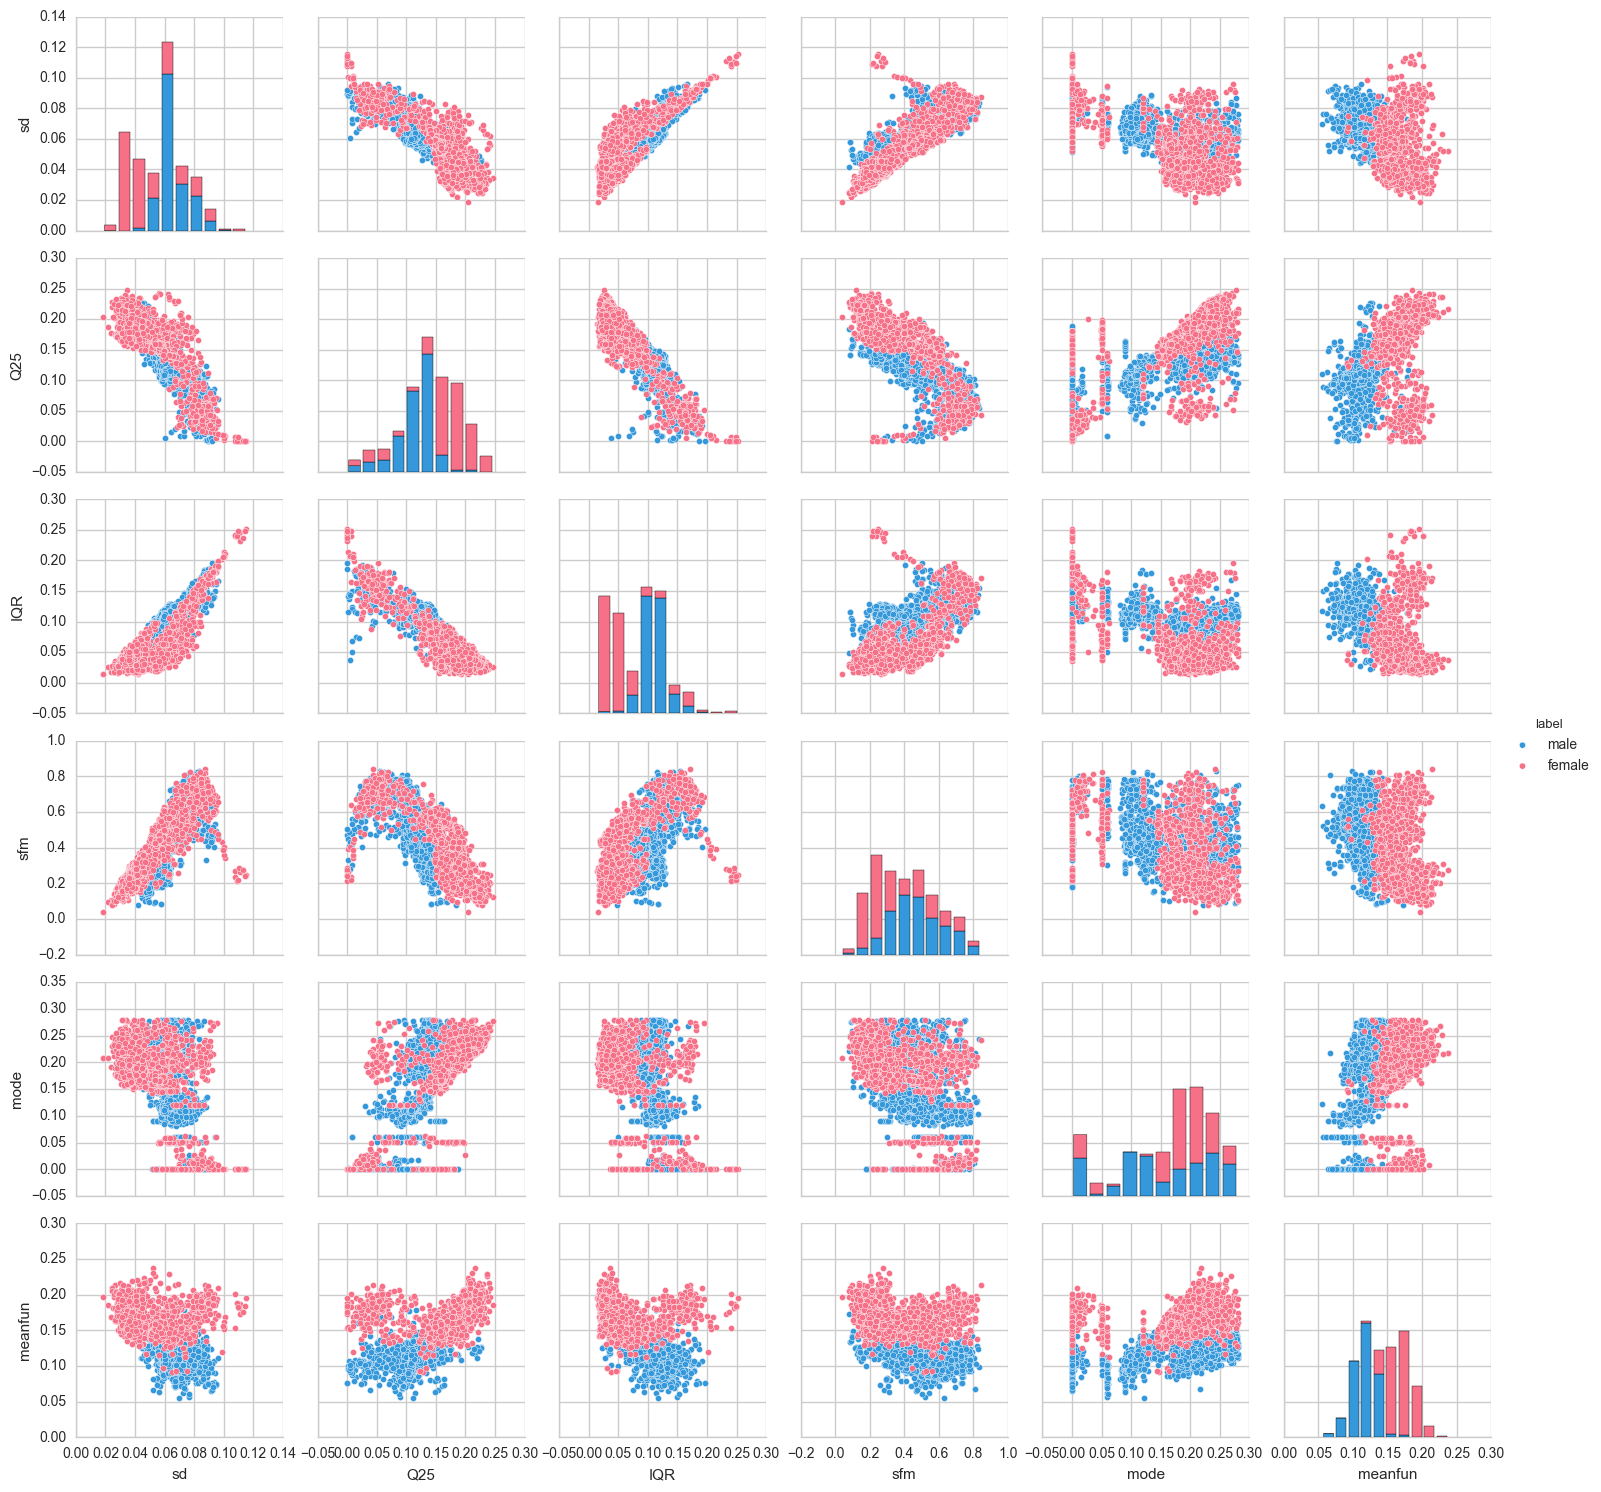

In [15]:
# Choose data with disjointed distrobutions across label
data_of_interest = ['sd','Q25','IQR','sfm','mode','meanfun']

# Colors to differentiate between "male" and "female" labelling
clr_m  = '#3498db'  # blue
clr_fm = '#F67088'  # pink

sns.pairplot(data_raw[data_of_interest + ['label']], hue='label', palette=sns.color_palette([clr_m, clr_fm]))

The data categories plotted above illustrate the relative separation of the data and provide confidence in our pursuit of creating successful machine learning algorithms. 

The most telling category is the **meanfun (mean fundamental frequency)**. As one would expect, the fundamental frequencies exhibited by male voices are much lower than those exhibited by females. Our final algoithms will likely place a large predictory weight on the **meanfun** category.

## Plot correlations between data categories

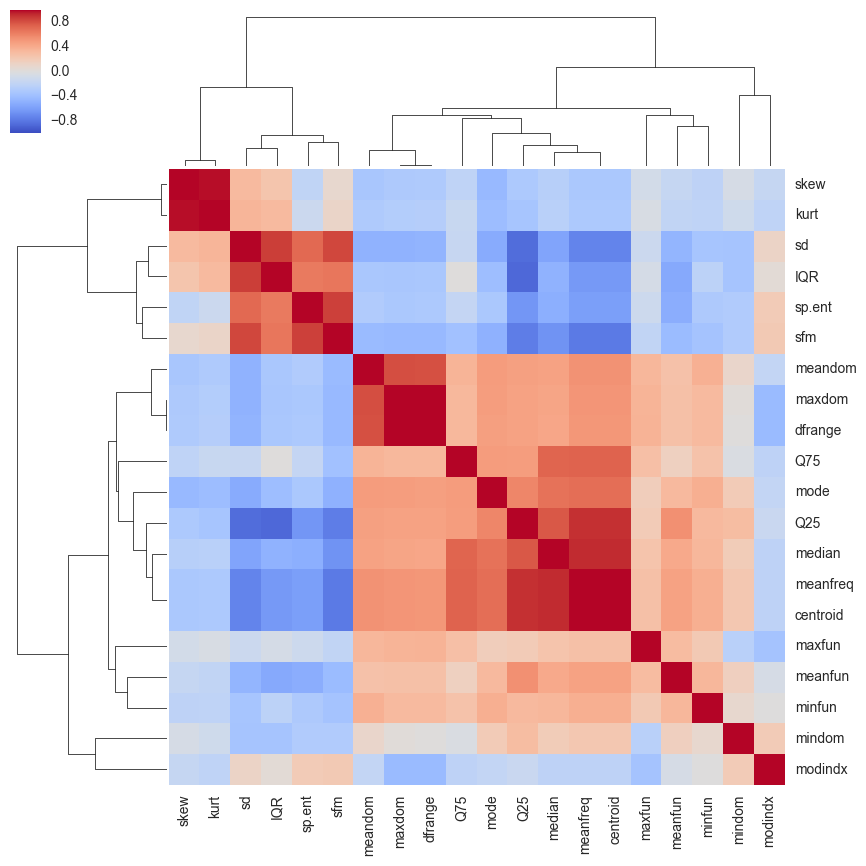

In [16]:
fig = sns.clustermap(data_raw.corr(), cmap='coolwarm')
for text in fig.ax_heatmap.get_yticklabels():
    text.set_rotation('horizontal')

Looking into the methodology behind the R language's *specprop (spectral properies)* function, we can see that **skewness (skew)** and **kurtosis (kurt)** are derived via the following equations:

$$ S = \frac{\sum_{i=1}^N(x_i-\bar{x})^3}{(N-1)\sigma^3} $$

$$ K = \frac{\sum_{i=1}^N(x_i-\bar{x})^4}{(N-1)\sigma^4} $$

Both skewness and kurtosis describe the distribution of data by shape. Skewness describes whether the destribution curve is left-leaning or right-leaning, and kurtosis describes how close to the median value a distribution falls. Because of their similar derivations, it is not surprising that they would be highly correlated in the data.

Similar similarities exist between the **centroid** and **meanfreq**, as well as **maxdom** and **dfrange**. Each are different specific values that attempt to quantify very similar aspects of the data.

Furthermore, **IQR (interquartile range)** and **Q25 (25th percentile location)** are very similar distribution measurements as well. The interquartile range measures the range that encompases "middle 50%" of the data, equal to the difference between the 75th and 25th percentiles. In this case, these two categories appear to have a strong *negative* correlation, implying that a low 25th percentile would yield a large IQR value. This relationship makes sense in the context of the data. A similar relationship does not exist with the **Q75** category, likely due to the positive skew of the data.

In [17]:
def save_obj(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, pickle.HIGHEST_PROTOCOL)

In [18]:
save_obj(data_raw,'var/data_raw')